# Sound Data: The Pursuit of the Ideal Song

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Locate the CSV file to be read.
spotify_data_path = "Resources/data.csv"

# Read the Spotify songs data.
spotify_data = pd.read_csv(spotify_data_path)

# Show the data
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982000,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732000,['Dennis Day'],0.819,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967000,['Frank Parker'],0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957000,['Phil Regan'],0.418,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.34600,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.1300,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996000,['John McCormack'],0.518,159507,0.20300,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993000,['Sergei Rachmaninoff'],0.389,218773,0.08800,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.3630,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996000,['Ignacio Corsini'],0.485,161520,0.13000,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982000,['Fortugé'],0.684,196560,0.25700,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.5040,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


## What makes a popular song a popular song?

In [4]:
# Establish bins for categorizing song popularity.
popularity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["Least Popular (1)", "2", "3", "4", "5", "6", "7", "8", "9", "Most Popular (10)"]

### Tempo?

In [5]:
# Create a DataFrame with only the "popularity" and "tempo" columns.
tempo_df = spotify_data[["popularity", "tempo"]]

In [6]:
# Categorize the popularity of each song based on the popularity bins.
tempo_df["Popularity Bin"] = pd.cut(tempo_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [7]:
# Group by the popularity bins and find the mean tempo for each one.
tempo_means = pd.DataFrame(tempo_df.groupby(["Popularity Bin"]).mean()["tempo"])
tempo_means

,tempo
Popularity Bin,
Least Popular (1),109.809226
2,113.385109
3,118.369305
4,119.354498
5,120.338871
6,120.172103
7,121.074647
8,120.720360
9,121.948016


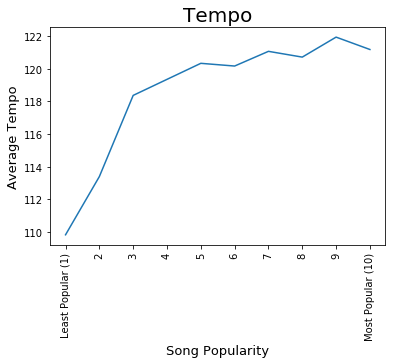

In [8]:
# Create a line graph of the DataFrame.
plt.plot(labels, tempo_means)
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Tempo", fontdict={"fontsize": 13})
plt.title("Tempo", fontdict={"fontsize": 20})
plt.show()

### Speechiness?

In [9]:
# Create a DataFrame with only the "popularity" and "speechiness" columns.
speechiness_df = spotify_data[["popularity", "speechiness"]]

In [10]:
# Categorize the popularity of each song based on the popularity bins.
speechiness_df["Popularity Bin"] = pd.cut(speechiness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [11]:
# Group by the popularity bins and find the mean speechiness for each one.
speechiness_means = pd.DataFrame(speechiness_df.groupby(["Popularity Bin"]).mean()["speechiness"])
speechiness_means

,speechiness
Popularity Bin,
Least Popular (1),0.167179
2,0.080372
3,0.063355
4,0.069378
5,0.077383
6,0.080210
7,0.093281
8,0.101280
9,0.102342


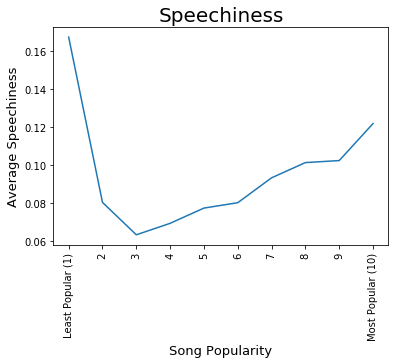

In [12]:
# Create a line graph of the DataFrame.
plt.plot(labels, speechiness_means)
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Speechiness", fontdict={"fontsize": 13})
plt.title("Speechiness", fontdict={"fontsize": 20})
plt.show()

### Loudness?

In [13]:
# Create a DataFrame with only the "popularity" and "loudness" columns.
loudness_df = spotify_data[["popularity", "loudness"]]

In [14]:
# Categorize the popularity of each song based on the popularity bins.
loudness_df["Popularity Bin"] = pd.cut(loudness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [15]:
# Group by the popularity bins and find the mean loudness for each one.
loudness_means = pd.DataFrame(loudness_df.groupby(["Popularity Bin"]).mean()["loudness"])
loudness_means

,loudness
Popularity Bin,
Least Popular (1),-15.017333
2,-13.693482
3,-12.162322
4,-11.060683
5,-9.439159
6,-8.482017
7,-7.871956
8,-6.844695
9,-6.593710


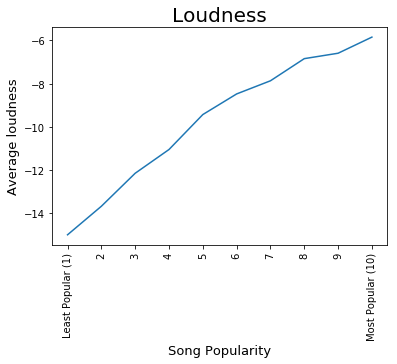

In [16]:
# Create a line graph of the DataFrame.
plt.plot(labels, loudness_means)
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average loudness", fontdict={"fontsize": 13})
plt.title("Loudness", fontdict={"fontsize": 20})
plt.show()

### Instrumentalness?

In [17]:
# Create a DataFrame with only the "popularity" and "instrumentalness" columns.
instrumentalness_df = spotify_data[["popularity", "instrumentalness"]]

In [18]:
# Categorize the popularity of each song based on the popularity bins.
instrumentalness_df["Popularity Bin"] = pd.cut(instrumentalness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [19]:
# Group by the popularity bins and find the mean instrumentalness for each one.
instrumentalness_means = pd.DataFrame(instrumentalness_df.groupby(["Popularity Bin"]).mean()["instrumentalness"])
instrumentalness_means

,instrumentalness
Popularity Bin,
Least Popular (1),0.324920
2,0.199388
3,0.144451
4,0.126959
5,0.106812
6,0.081055
7,0.058884
8,0.023805
9,0.013756


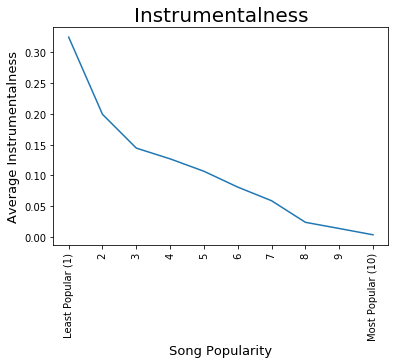

In [20]:
# Create a line graph of the DataFrame.
plt.plot(labels, instrumentalness_means)
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Instrumentalness", fontdict={"fontsize": 13})
plt.title("Instrumentalness", fontdict={"fontsize": 20})
plt.show()

### Acousticness?

In [21]:
# Create a DataFrame with only the "popularity" and "acousticness" columns.
acousticness_df = spotify_data[["popularity", "acousticness"]]

In [22]:
# Categorize the popularity of each song based on the popularity bins.
acousticness_df["Popularity Bin"] = pd.cut(acousticness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [23]:
# Group by the popularity bins and find the mean acousticness for each one.
acousticness_means = pd.DataFrame(acousticness_df.groupby(["Popularity Bin"]).mean()["acousticness"])
acousticness_means

,acousticness
Popularity Bin,
Least Popular (1),0.845349
2,0.724277
3,0.478301
4,0.379986
5,0.325177
6,0.291735
7,0.272957
8,0.237937
9,0.251331


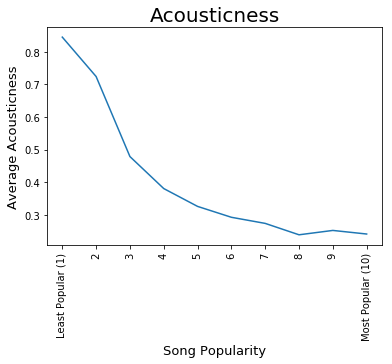

In [24]:
# Create a line graph of the DataFrame.
plt.plot(labels, acousticness_means)
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Acousticness", fontdict={"fontsize": 13})
plt.title("Acousticness", fontdict={"fontsize": 20})
plt.show()

### Key?

In [25]:
# Create a DataFrame with only the "popularity" and "key" columns.
key_df = spotify_data[["popularity", "key"]]

In [26]:
# Categorize the popularity of each song based on the popularity bins.
key_df["Popularity Bin"] = pd.cut(key_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [27]:
# Group by the popularity bins and find the mean key for each one.
key_means = pd.DataFrame(key_df.groupby(["Popularity Bin"]).mean()["key"])
key_means

,key
Popularity Bin,
Least Popular (1),5.185133
2,5.083505
3,5.136957
4,5.226351
5,5.255078
6,5.244874
7,5.201031
8,5.261572
9,5.319608


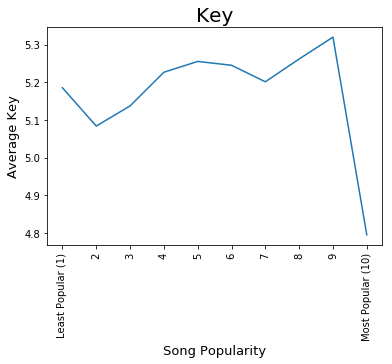

In [28]:
# Create a line graph of the DataFrame.
plt.plot(labels, key_means)
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Key", fontdict={"fontsize": 13})
plt.title("Key", fontdict={"fontsize": 20})
plt.show()